## Dataset Overview
This dataset provides credit related data for loans that were issued in 2018 by a unspecified institution. 

The dataset contains 855969 observations across 73 columns and can be found at the following link:

https://www.kaggle.com/manishpthakur/pythonproject

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn import ensemble
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE


%matplotlib inline

## Load the dataset in and run data discovery steps

In [2]:
Credit = pd.read_csv('data/CreditRisk.csv')

In [3]:
Credit.shape

(855969, 41)

In [4]:
Credit.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'pymnt_plan', 'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code',
       'application_type', 'acc_now_delinq', 'default_ind'],
      dtype='object')

In [5]:
pd.options.display.max_rows = 999
Credit.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,5000.00,861.07,0.00,0.00,0.00,171.62,1,INDIVIDUAL,0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL,0,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,2400.00,603.65,0.00,0.00,0.00,649.91,1,INDIVIDUAL,0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,10000.00,2209.33,16.97,0.00,0.00,357.48,1,INDIVIDUAL,0,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,2233.10,1009.07,0.00,0.00,0.00,67.79,1,INDIVIDUAL,0,0


In [6]:
Credit.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,acc_now_delinq,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,...,855969.00000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.0,855969.000000,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,...,7622.22052,5850.841088,1755.046221,0.319530,47.089499,4.951227,2225.985295,1.0,0.004944,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,...,7885.15640,6676.410888,2081.692980,3.609399,413.136043,62.478569,4864.966593,0.0,0.077333,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,...,1960.12000,1239.950000,451.270000,0.000000,0.000000,0.000000,285.420000,1.0,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,...,4948.25000,3286.890000,1076.910000,0.000000,0.000000,0.000000,468.820000,1.0,0.000000,0.000000
75%,5.446311e+07,5.803559e+07,20000.000000,20000.000000,20000.000000,15.990000,571.560000,9.000000e+04,23.900000,0.000000,...,10697.33000,8000.000000,2233.980000,0.000000,0.000000,0.000000,849.160000,1.0,0.000000,0.000000
max,6.861687e+07,7.351969e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,57777.58000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36475.590000,1.0,14.000000,1.000000


## Exploratory Analysis (Univariate and Bivariate)

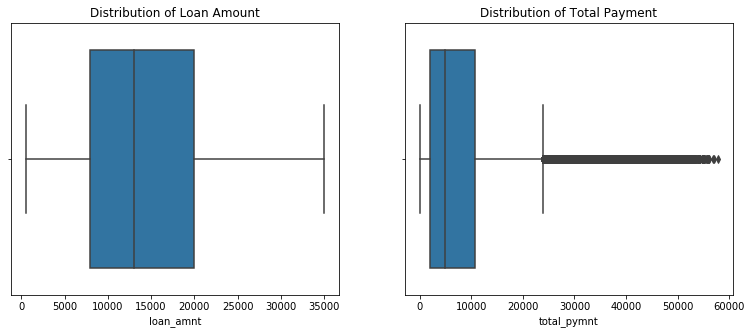

count    855969.000000
mean      14745.571335
std        8425.340005
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64
count    855969.000000
mean       7653.296336
std        7909.383591
min           0.000000
25%        1969.690000
50%        4976.160000
75%       10744.803650
max       57777.579870
Name: total_pymnt, dtype: float64


In [6]:
# Start with loan_amnt and total_pymnt

plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
sns.boxplot(x=Credit["loan_amnt"])
plt.title('Distribution of Loan Amount')

plt.subplot(1,3,2)
sns.boxplot(x=Credit["total_pymnt"])
plt.title('Distribution of Total Payment')
plt.show()

print(Credit['loan_amnt'].describe())
print(Credit['total_pymnt'].describe())

count    8.559690e+05
mean     7.507119e+04
std      6.426447e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64


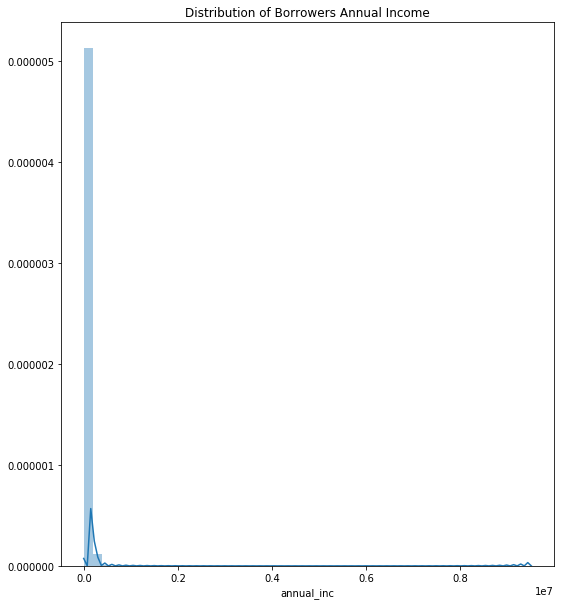

In [8]:
#Next look at borrowers annual income

plt.figure(figsize=[30,10])

plt.subplot(1,3,1)
sns.distplot(Credit['annual_inc'].dropna())
plt.title('Distribution of Borrowers Annual Income')
print(Credit['annual_inc'].describe())

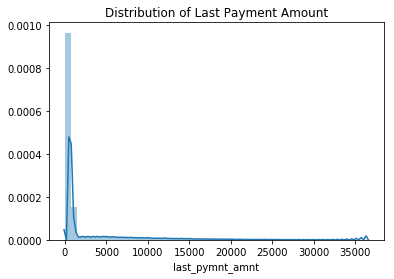

count    855969.000000
mean       2225.985295
std        4864.966593
min           0.000000
25%         285.420000
50%         468.820000
75%         849.160000
max       36475.590000
Name: last_pymnt_amnt, dtype: float64


In [6]:
#Next, look at last payment amount

sns.distplot(Credit['last_pymnt_amnt'].dropna())
plt.title('Distribution of Last Payment Amount')
plt.show()
print(Credit['last_pymnt_amnt'].describe())

#### Will need to remove right skewness due to extreme outlier in data cleaning section. If you look at the describe method results, you'll see a maximum of 36475, when 75% of the data is under 849.

Text(0.5,1,'Distribution of Revolving Balance')

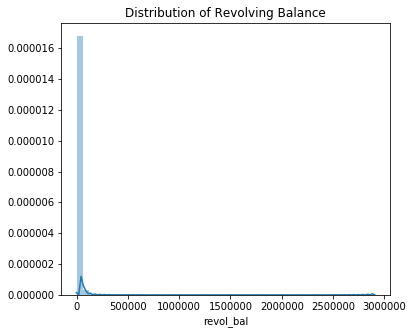

In [10]:
#Next look at Revolving Balance

plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
sns.distplot(Credit['revol_bal'].dropna())
plt.title('Distribution of Revolving Balance')


Text(0.5,1,'Distribution of Total Received Interest')

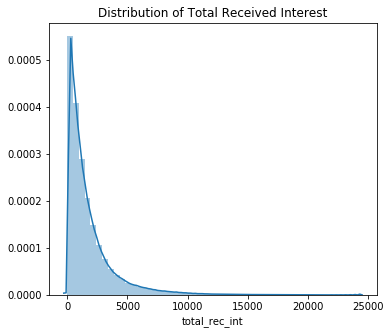

In [11]:
# Next look at Total Received Interest

plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
sns.distplot(Credit['total_rec_int'].dropna())
plt.title('Distribution of Total Received Interest')

Text(0.5,1,'Distribution of Total Received Principle')

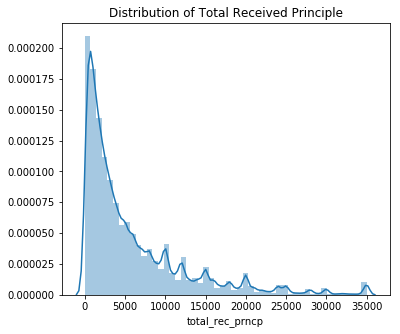

In [12]:
# Next look at Total Received Principle

plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
sns.distplot(Credit['total_rec_prncp'].dropna())
plt.title('Distribution of Total Received Principle')

Text(0.5,1,'Distribution of Total Received Late Fees')

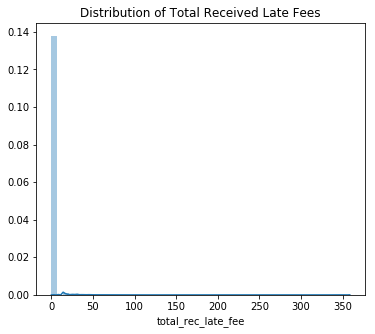

In [13]:
# Next look at Total Received Late Fees

plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
sns.distplot(Credit['total_rec_late_fee'].dropna())
plt.title('Distribution of Total Received Late Fees')

In [ ]:
# Next look at Total Recoveries

plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
sns.distplot(Credit['recoveries'].dropna())
plt.title('Distribution of Total Recoveries')

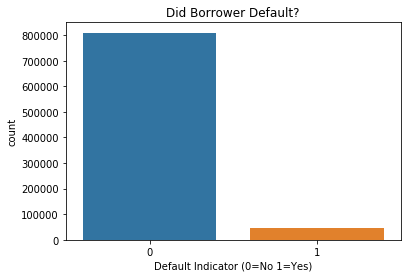

In [7]:
sns.countplot(x='default_ind', data=Credit)
plt.title('Did Borrower Default?')
plt.xlabel('Default Indicator (0=No 1=Yes)')
plt.show()

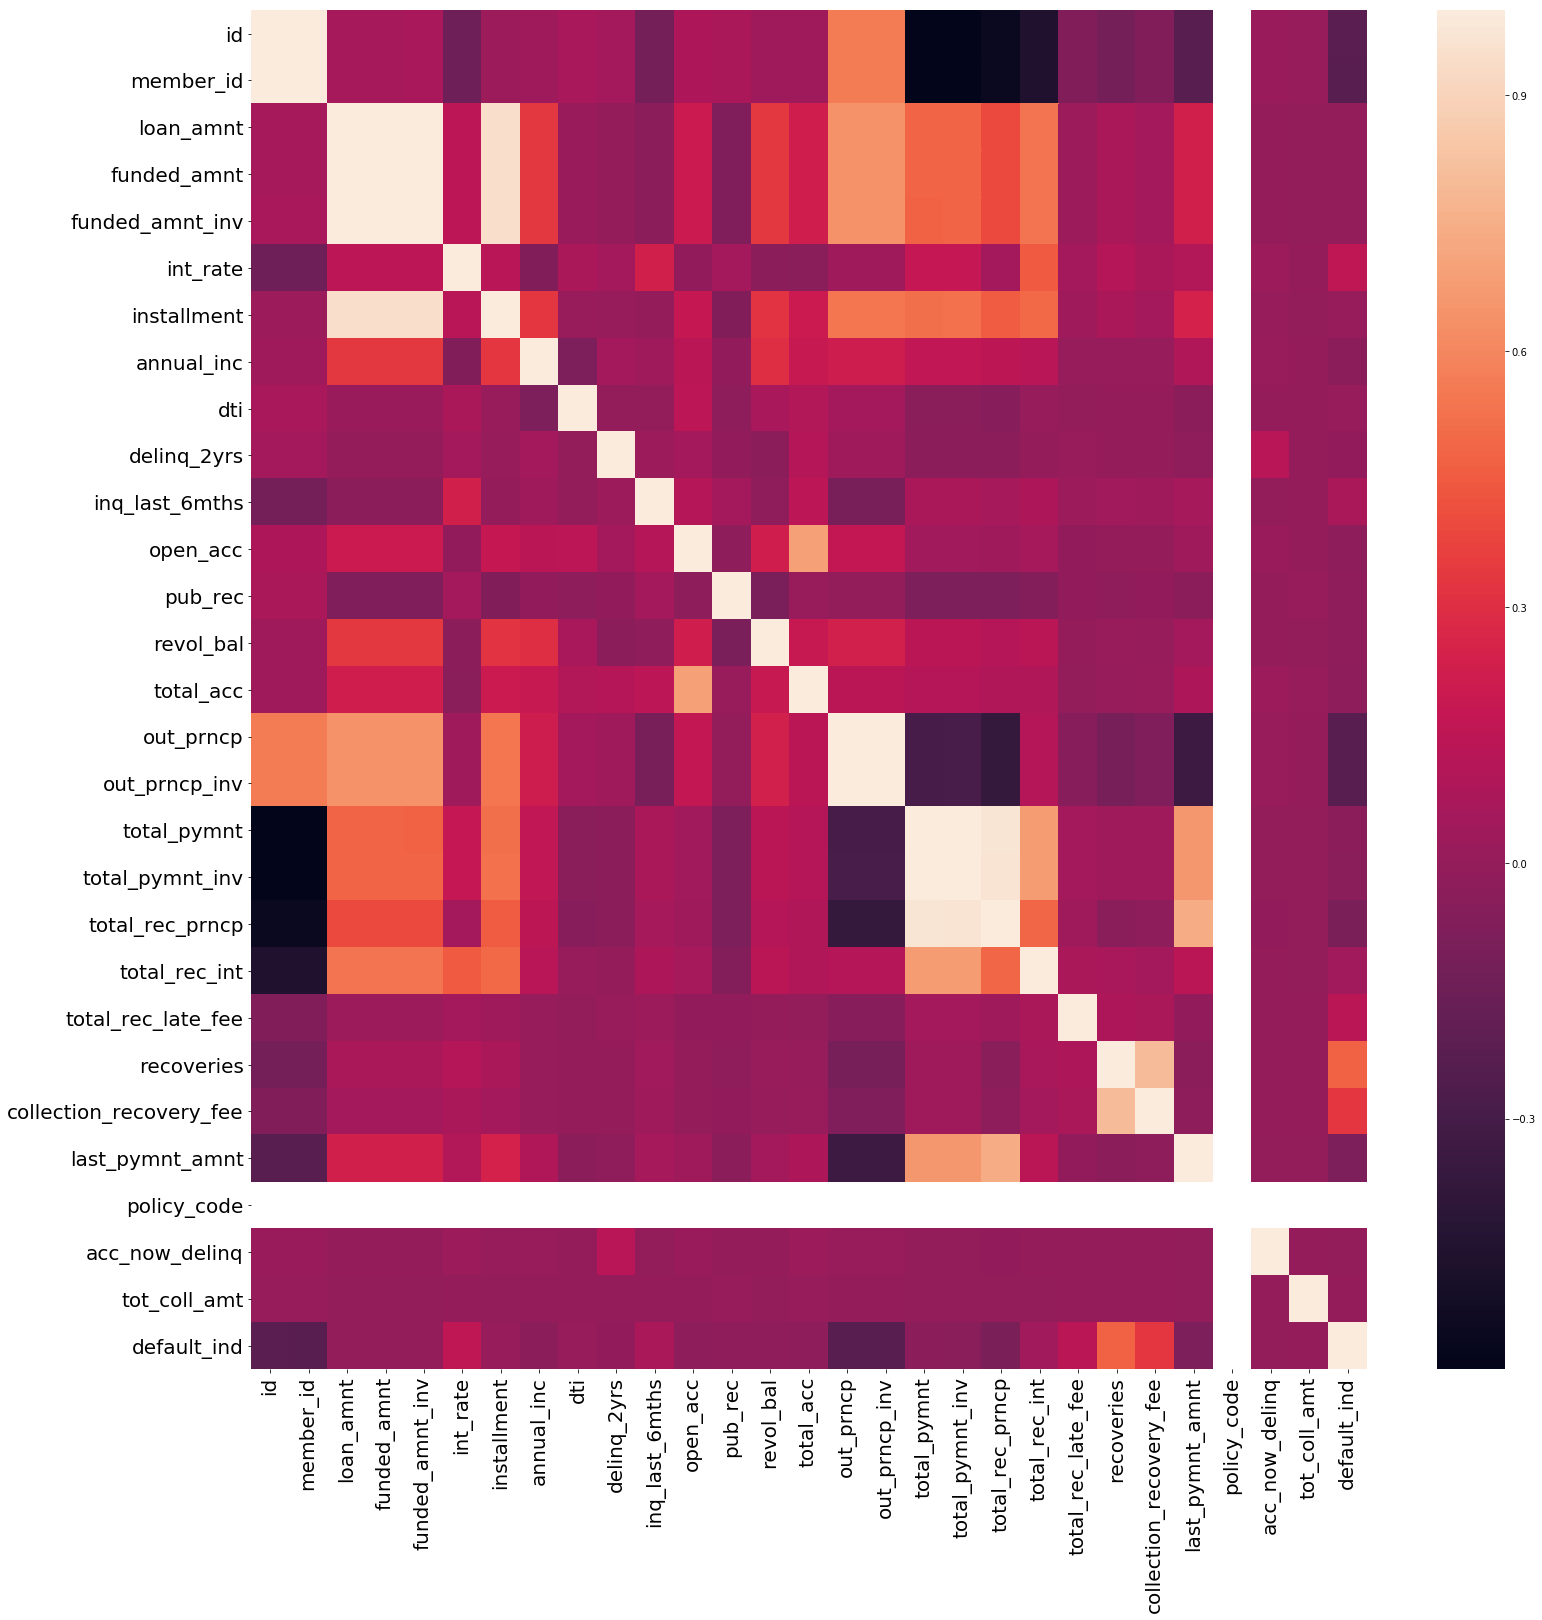

In [13]:
#Correlation matrix with sns.heatmap

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(25, 25))

sns.heatmap(Credit.corr())
plt.xticks(size=20)
plt.yticks(size=20, rotation='horizontal')
plt.show()


In [4]:
#Determine missing values across dataframe

missing_values_count = Credit.isnull().sum()
print(missing_values_count)

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
pymnt_plan                 0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries    

In [4]:
Credit.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,5000.00,861.07,0.00,0.00,0.00,171.62,1,INDIVIDUAL,0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL,0,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,2400.00,603.65,0.00,0.00,0.00,649.91,1,INDIVIDUAL,0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,10000.00,2209.33,16.97,0.00,0.00,357.48,1,INDIVIDUAL,0,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,2233.10,1009.07,0.00,0.00,0.00,67.79,1,INDIVIDUAL,0,0


# Feature Selection / Engineering

In [9]:
#Get rid of skewness/outliers in receive interest
Credit['total_rec_int'].quantile(0.95)

5868.9699999999975

In [11]:
# Transform total receievd interest based on quantile method above
Credit = Credit[Credit['total_rec_int'] <= 12.2]

## Define Research Question


In [3]:
X = Credit.drop(['default_ind'], 1)
X = pd.get_dummies(X)
Y = Credit.total_rec_int

#Show final feature count that goes into model
print(X.shape)

(855969, 1882)


## Naive Bayes


In [3]:
# Create Function

def NB_Model(model):
        import timeit
        start = timeit.default_timer()
        if model == 'Bernoulli':
                NB_Model = BernoulliNB()
                NB_Model.fit(X, Y)
                positive_pred = NB_Model.predict(X)
                print('\n Percentage accuracy for Bernoulli Naive Bayes')
        
        elif model == 'Gaussian':
                NB_Model = GaussianNB()
                NB_Model.fit(X, Y)
                positive_pred = NB_Model.predict(X)
                print('\n Percentage accuracy for Gaussian Naive Bayes')

        else:
                NB_Model = MultinomialNB()
                NB_Model.fit(X, Y)
                positive_pred = NB_Model.predict(X)
                print('\n Percentage accuracy for Multinomial Naive Bayes')
            
        print(str(NB_Model.score(X, Y)*100) + '%')
        print('\n Cross-Validation Score')
        print(cross_val_score(NB_Model, X, Y, cv=5))
        print('\n Confusion Matrix')
        display(confusion_matrix(Y, positive_pred))
        
        #Print time
        stop = timeit.default_timer()
        execution_time = stop - start
        print("\n\n Program Executed in {}".format(round(execution_time, 2)))     

## K-Nearest Neighbors

In [4]:
#Create function

def KNN_Model(k, weight):
    import timeit
    start = timeit.default_timer()
    KNN = KNeighborsClassifier(n_neighbors=k, weights=weight)
    KNN.fit(X, Y)
    positive_pred = KNN.predict(X)
    print('\n Percentage accuracy for K Nearest Neighbors Classifier')
    print(str(KNN.score(X, Y)*100) + '%')
    print('\n Cross-Validation Score')
    print(cross_val_score(KNN, X, Y, cv=5))
    print('\n Confusion Matrix')
    display(confusion_matrix(Y, positive_pred))
    
    #Print time
    stop = timeit.default_timer()
    execution_time = stop - start
    print("\n\n Program Executed in {}".format(round(execution_time, 2)))

## Random Forest


In [5]:
#Create function

def RFC_Model(trees, criteria, num_features, depth):
    import timeit
    start = timeit.default_timer()
    rfc = ensemble.RandomForestClassifier(n_estimators=trees, criterion=criteria, max_features=num_features, max_depth=depth)
    rfc.fit(X, Y)
    positive_pred = rfc.predict(X)
    print('\n Percentage accuracy for Random Forest Classifier')
    print(str(rfc.score(X, Y)*100) + '%')
    print('\n Cross-Validation Score')
    print(cross_val_score(rfc, X, Y, cv=5))
    print('\n Confusion Matrix')
    display(confusion_matrix(Y, positive_pred))
    
    #Print time
    stop = timeit.default_timer()
    execution_time = stop - start
    print("\n\n Program Executed in {}".format(round(execution_time, 2)))

## Logistic Regression

In [6]:
#Create function

def Logistic_Reg_Model(regularization, alpha):
    import timeit
    start = timeit.default_timer()
    if regularization == 'l1':
        lr_lasso = LogisticRegression(penalty=regularization, C=alpha)
        lr_lasso.fit(X, Y)
        positive_pred = lr_lasso.predict(X)
        print('\n Percentage accuracy for Lasso Logistic Regression')
        print(str(lr_lasso.score(X, Y)*100) + '%')
        print('\n Cross-Validation Score')
        print(cross_val_score(lr_lasso, X, Y, cv=5))
        print('\n Confusion Matrix')
        display(confusion_matrix(Y, positive_pred))
        
    elif regularization == 'l2' and alpha == 1e9:
        lr_regular = LogisticRegression(penalty=regularization, C=alpha)
        lr_regular.fit(X, Y)
        positive_pred = lr_regular.predict(X)
        print('\n Percentage accuracy for Logistic Regression')
        print(str(lr_regular.score(X, Y)*100) + '%')
        print('\n Cross-Validation Score')
        print(cross_val_score(lr_regular, X, Y, cv=5))
        print('\n Confusion Matrix')
        display(confusion_matrix(Y, positive_pred))
    else:
        lr_ridge = LogisticRegression(penalty=regularization, C=alpha)
        lr_ridge.fit(X, Y)
        positive_pred = lr_ridge.predict(X)
        print('\n Percentage accuracy for Ridge Logistic Regression')
        print(str(lr_ridge.score(X, Y)*100) + '%')
        print('\n Cross-Validation Score')
        print(cross_val_score(lr_ridge, X, Y, cv=5))
        print('\n Confusion Matrix')
        display(confusion_matrix(Y, positive_pred))
        
     #Print time
    stop = timeit.default_timer()
    execution_time = stop - start
    print("\n\n Program Executed in {}".format(round(execution_time, 2)))

## Support Vector Classifer

In [7]:
#Create function

def SVC_Model(c, kernel_type):
    import timeit
    start = timeit.default_timer()
    svm = SVC(C=c, kernel=kernel_type)
    svm.fit(X, Y)
    positive_pred = svm.predict(X)
    print('\n Percentage accuracy for SVM')
    print(str(svm.score(X, Y)*100) + '%')
    print('\n Cross-Validation Score')
    print(cross_val_score(svm, X, Y, cv=5))
    print('\n Confusion Matrix')
    display(confusion_matrix(Y, positive_pred))
    
    #Print time
    stop = timeit.default_timer()
    execution_time = stop - start
    print("\n\n Program Executed in {}".format(round(execution_time, 2)))

## Gradient Boosting

In [8]:
#Create function

def Gradient_Boost_Model(estimators, depth, loss_function, sampling):
    import timeit
    start = timeit.default_timer()
    clf = ensemble.GradientBoostingClassifier(n_estimators=estimators, max_depth=depth, loss=loss_function, subsample=sampling)
    clf.fit(X, Y)
    positive_pred = clf.predict(X)
    print('\n Percentage accuracy for Gradient Boosting Classifier')
    print(str(clf.score(X, Y)*100) + '%')
    print('\n Cross-Validation Score')
    print(cross_val_score(clf, X, Y, cv=5))
    print('\n Confusion Matrix')
    display(confusion_matrix(Y, positive_pred))
    
    #Print time
    stop = timeit.default_timer()
    execution_time = stop - start
    print("\n\n Program Executed in {}".format(round(execution_time, 2)))

## Run Initial Models, Default Parameters

In [9]:
#Use a sample so that our models will run without using too much computing power
Credit = Credit.sample(n = 1000)

#Reestablish X and Y
X = Credit.drop(['default_ind'], 1)
X = pd.get_dummies(X)
Y = Credit.default_ind

In [10]:
Credit.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 607537 to 724428
Data columns (total 41 columns):
id                         1000 non-null int64
member_id                  1000 non-null int64
loan_amnt                  1000 non-null int64
funded_amnt                1000 non-null int64
funded_amnt_inv            1000 non-null float64
term                       1000 non-null object
int_rate                   1000 non-null float64
installment                1000 non-null float64
grade                      1000 non-null object
sub_grade                  1000 non-null object
home_ownership             1000 non-null object
annual_inc                 1000 non-null float64
verification_status        1000 non-null object
issue_d                    1000 non-null object
pymnt_plan                 1000 non-null object
purpose                    1000 non-null object
zip_code                   1000 non-null object
addr_state                 1000 non-null object
dti                   

In [21]:
#Calculate baseline accuracy for default indicator
Default_total = Credit['default_ind'].sum()
print('Baseline accuracy for Borrower Defaulting is: ' + str(round((Default_total/Credit.shape[0])*100, 2)) + '%')


Baseline accuracy for Borrower Defaulting is: 5.34%


In [22]:
#Run all models with default criteria, with returns in between so we can easily read

#Bernoulli Naive Bayes
NB_Model('Bernoulli')
print('\n\n')

#K-Nearest Neighbors
KNN_Model(5, 'uniform')
print('\n\n')

#Random Forest
RFC_Model(10, 'gini', 'auto', None)
print('\n\n')

#Plain Logistic Regression
Logistic_Reg_Model('l2', 1e9)
print('\n\n')

#Lasso Logistic Regression
Logistic_Reg_Model('l1', 1.0)
print('\n\n')

#Ridge Logistic Regression
Logistic_Reg_Model('l2', 1.0)
print('\n\n')

#Support Vector Classifier
SVC_Model(1.0, 'rbf')
print('\n\n')

#Gradient boost classifier
Gradient_Boost_Model(100, 3, 'deviance', 1.0)


 Percentage accuracy for Bernoulli Naive Bayes
97.52%

 Cross-Validation Score
[0.98001    0.9805     0.9745     0.97       0.96798399]

 Confusion Matrix


array([[9248,  218],
       [  30,  504]])



 Program Executed in 9.71




 Percentage accuracy for K Nearest Neighbors Classifier
98.05%

 Cross-Validation Score
[0.97751124 0.9705     0.974      0.969      0.97098549]

 Confusion Matrix


array([[9365,  101],
       [  94,  440]])



 Program Executed in 54.13




 Percentage accuracy for Random Forest Classifier
100.0%

 Cross-Validation Score
[0.99950025 0.9985     0.9975     0.999      0.99849925]

 Confusion Matrix


array([[9466,    0],
       [   0,  534]])



 Program Executed in 4.37




 Percentage accuracy for Logistic Regression
98.68%

 Cross-Validation Score
[0.97901049 0.9755     0.9725     0.974      0.97748874]

 Confusion Matrix


array([[9437,   29],
       [ 103,  431]])



 Program Executed in 6.46




 Percentage accuracy for Lasso Logistic Regression
99.95%

 Cross-Validation Score
[0.99850075 0.9995     0.9985     0.999      0.9989995 ]

 Confusion Matrix


array([[9466,    0],
       [   5,  529]])



 Program Executed in 27.4




 Percentage accuracy for Ridge Logistic Regression
98.88%

 Cross-Validation Score
[0.99250375 0.9865     0.9725     0.9745     0.99249625]

 Confusion Matrix


array([[9453,   13],
       [  99,  435]])



 Program Executed in 6.8




 Percentage accuracy for SVM
100.0%

 Cross-Validation Score
[0.94652674 0.9465     0.9465     0.9465     0.94697349]

 Confusion Matrix


array([[9466,    0],
       [   0,  534]])



 Program Executed in 4193.02




 Percentage accuracy for Gradient Boosting Classifier
100.0%

 Cross-Validation Score
[1.         0.9995     0.9995     0.999      0.99949975]

 Confusion Matrix


array([[9466,    0],
       [   0,  534]])



 Program Executed in 169.84


## Finding the Right Values for our Parameters

In [11]:
def tuned_params(model):
    
        if model == 'KNN':
                KNN = np.arange(1, 501, 100)
                KNN_df = pd.DataFrame()
                for i in KNN:
                    KNN_model = KNeighborsClassifier(n_neighbors=i, weights='distance')
                    KNN_model.fit(X, Y)
                    positive_pred = KNN_model.predict(X)
                    cross_val = cross_val_score(KNN_model, X, Y, cv=5).mean()*100
                    score = KNN_model.score(X, Y)*100
                    KNN_df_temp = pd.DataFrame({'K': i, 'training': score, 'test': cross_val}, index=[0])
                    KNN_df = KNN_df.append(KNN_df_temp)
                plt.plot(KNN_df['K'], KNN_df['training'], color = 'r', linewidth = 3, label='Training')
                plt.plot(KNN_df['K'], KNN_df['test'], color = 'b', linewidth = 3, label='Test')
                plt.xlabel('K Parameter', fontsize=20)
                plt.title('KNN - Training vs. Test')
                plt.show()
                
        elif model == 'Random Forest':
                random_forest = np.arange(100, 500, 100)
                random_forest_df = pd.DataFrame()
                for i in random_forest:
                    rfc = ensemble.RandomForestClassifier(n_estimators=i)
                    rfc.fit(X, Y)
                    positive_pred = rfc.predict(X)
                    cross_val = cross_val_score(rfc, X, Y, cv=5).mean()*100
                    score = rfc.score(X, Y)*100
                    random_forest_df_temp = pd.DataFrame({'estimators': i, 'training': score, 'test': cross_val}, index=[0])
                    random_forest_df = random_forest_df.append(random_forest_df_temp)
                plt.plot(random_forest_df['estimators'], random_forest_df['training'], color = 'r', linewidth = 3, label='Training')
                plt.plot(random_forest_df['estimators'], random_forest_df['test'], color = 'b', linewidth = 3, label='Test')
                plt.xlabel('Estimators Parameter', fontsize=20)
                plt.title('Random Forest - Training vs. Test')
                plt.show()
        
        elif model == 'Lasso':
                lasso = np.arange(0.2, 1.0, 0.2)
                lasso_df = pd.DataFrame()
                for i in lasso:
                    lr_lasso = LogisticRegression(penalty='l1', C=i)
                    lr_lasso.fit(X, Y)
                    positive_pred = lr_lasso.predict(X)
                    cross_val = cross_val_score(lr_lasso, X, Y, cv=5).mean()*100
                    score = lr_lasso.score(X, Y)*100
                    lasso_df_temp = pd.DataFrame({'C': i, 'training': score, 'test': cross_val}, index=[0])
                    lasso_df = lasso_df.append(lasso_df_temp)
                plt.plot(lasso_df['C'], lasso_df['training'], color = 'r', linewidth = 3, label='Training')
                plt.plot(lasso_df['C'], lasso_df['test'], color = 'b', linewidth = 3, label='Test')
                plt.xlabel('C Parameter', fontsize=20)
                plt.title('Lasso - Training vs. Test')
                plt.show()
            
        elif model == 'Ridge':
                ridge = np.arange(1, 5001, 1000)
                ridge_df = pd.DataFrame()
                for i in ridge:
                    lr_ridge = LogisticRegression(C=i)
                    lr_ridge.fit(X, Y)
                    positive_pred = lr_ridge.predict(X)
                    cross_val = cross_val_score(lr_ridge, X, Y, cv=5).mean()*100
                    score = lr_ridge.score(X, Y)*100
                    ridge_df_temp = pd.DataFrame({'C': i, 'training': score, 'test': cross_val}, index=[0])
                    ridge_df = ridge_df.append(ridge_df_temp)
                plt.plot(ridge_df['C'], ridge_df['training'], color = 'r', linewidth = 3, label='Training')
                plt.plot(ridge_df['C'], ridge_df['test'], color = 'b', linewidth = 3, label='Test')
                plt.xlabel('C Parameter', fontsize=20)
                plt.title('Ridge - Training vs. Test')
                plt.show()
                
        elif model == 'SVC':
                svc = np.arange(0.2, 1.0, 0.2)
                svc_df = pd.DataFrame()
                for i in svc:
                    svm = SVC(C=i)
                    svm.fit(X, Y)
                    positive_pred = svm.predict(X)
                    cross_val = cross_val_score(svm, X, Y, cv=5).mean()*100
                    score = svm.score(X, Y)*100
                    svc_df_temp = pd.DataFrame({'C': i, 'training': score, 'test': cross_val}, index=[0])
                    svc_df = svc_df.append(svc_df_temp)
                plt.plot(svc_df['C'], svc_df['training'], color = 'r', linewidth = 3, label='Training')
                plt.plot(svc_df['C'], svc_df['test'], color = 'b', linewidth = 3, label='Test')
                plt.xlabel('C Parameter', fontsize=20)
                plt.title('SVC - Training vs. Test', fontsize=30)
                plt.show()
                
        else:
                grad_boost = np.arange(100, 500, 100)
                grad_boost_df = pd.DataFrame()
                for i in grad_boost:
                    clf = ensemble.GradientBoostingClassifier(n_estimators=i)
                    clf.fit(X, Y)
                    positive_pred = clf.predict(X)
                    cross_val = cross_val_score(clf, X, Y, cv=5).mean()*100
                    score = clf.score(X, Y)*100
                    grad_boost_df_temp = pd.DataFrame({'estimators': i, 'training': score, 'test': cross_val}, index=[0])
                    grad_boost_df = grad_boost_df.append(grad_boost_df_temp)
                plt.plot(grad_boost_df['estimators'], grad_boost_df['training'], color = 'r', linewidth = 3, label='Training')
                plt.plot(grad_boost_df['estimators'], grad_boost_df['test'], color = 'b', linewidth = 3, label='Test')
                plt.xlabel('Estimators Parameter', fontsize=20)
                plt.title('Gradient Boost - Training vs. Test')
                plt.show()

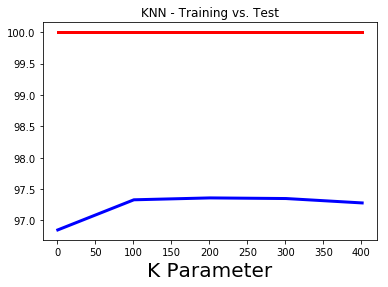

In [24]:
tuned_params('KNN')

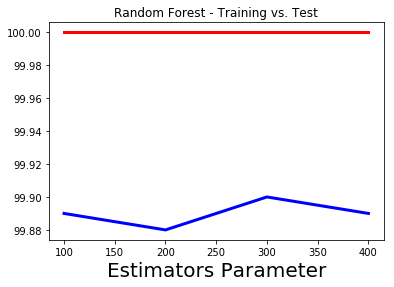

In [25]:
tuned_params('Random Forest')

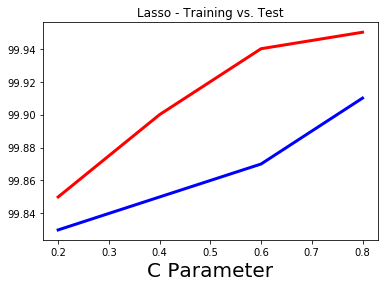

In [27]:
tuned_params('Lasso')

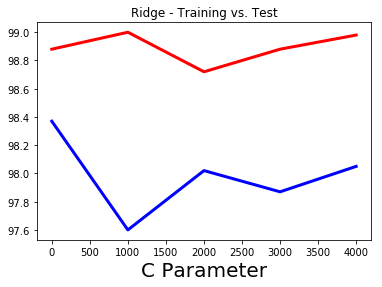

In [28]:
tuned_params('Ridge')

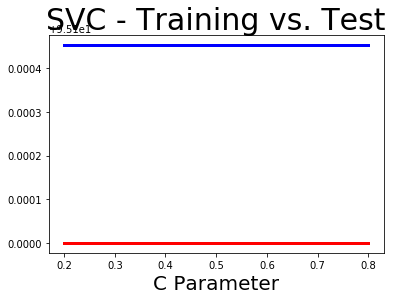

In [11]:
tuned_params('SVC')

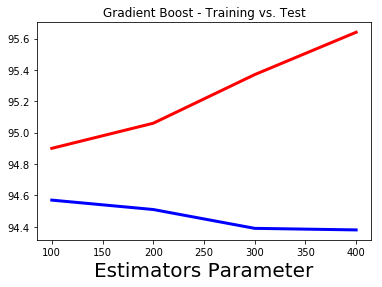

In [24]:
tuned_params('Gradient Boost')

## Run Models Again, This Time with Tuned Parameters

In [ ]:
#Run Gaussian instead of Bernoulli
NB_Model('Gaussian')
print('\n\n')

#K-Nearest Neighbors (use 100 for K instead of 5 and 'distance' for weight)
KNN_Model(100, 'distance')
print('\n\n')

#Random Forest (use 50 trees, 'entropy' as the criterion)
RFC_Model(50, 'entropy', 'auto', None)
print('\n\n')

#Lasso Logistic Regression (change alpha to 0.5)
Logistic_Reg_Model('l1', 0.2)
print('\n\n')

#Ridge Logistic Regression (change alpha to 5000)
Logistic_Reg_Model('l2', 5000)
print('\n\n')




 Percentage accuracy for Gaussian Naive Bayes
85.21%

 Cross-Validation Score
[0.85207396 0.8605     0.854      0.847      0.84842421]

 Confusion Matrix


array([[8000, 1411],
       [  68,  521]])



 Program Executed in 8.79




 Percentage accuracy for K Nearest Neighbors Classifier
100.0%

 Cross-Validation Score
[0.94102949 0.941      0.941      0.941      0.94147074]

 Confusion Matrix


array([[9411,    0],
       [   0,  589]])



 Program Executed in 54.37




 Percentage accuracy for Random Forest Classifier
99.99%

 Cross-Validation Score
[0.98350825 0.983      0.983      0.9795     0.97998999]

 Confusion Matrix


array([[9411,    0],
       [   1,  588]])



 Program Executed in 18.26




 Percentage accuracy for Lasso Logistic Regression
99.61%

 Cross-Validation Score
[0.996002  0.9925    0.996     0.995     0.9969985]

 Confusion Matrix


array([[9411,    0],
       [  39,  550]])



 Program Executed in 45.34




 Percentage accuracy for Ridge Logistic Regression
99.29%

 Cross-Validation Score
[0.99350325 0.9915     0.9945     0.9815     0.99549775]

 Confusion Matrix


array([[9408,    3],
       [  68,  521]])



 Program Executed in 4.93





In [ ]:
#Support Vector Classifier (change kernel to 'linear')
SVC_Model(1.0, 'linear')
print('\n\n')



In [8]:
#Gradient boost classifier (more estimators and subsampling)
Gradient_Boost_Model(300, 3, 'deviance', 0.8)


 Percentage accuracy for Gradient Boosting Classifier
100.0%

 Cross-Validation Score
[0.9800995  0.95       0.97       0.97       0.93467337]

 Confusion Matrix


array([[944,   0],
       [  0,  56]])



 Program Executed in 42.41


Text(0,0.5,'Cumulative Explained Variance')

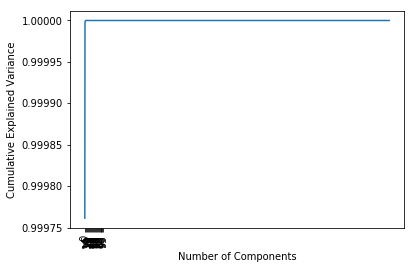

In [8]:
#Determining proper number of components

from sklearn.decomposition import PCA 

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.xticks(np.arange(0,100, 5), rotation = 'vertical')
plt.ylabel('Cumulative Explained Variance')

In [10]:
sklearn_pca = PCA(n_components=5)
Credit_pca = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [9.99761351e-01 2.35240653e-04 2.66870760e-06 4.07578515e-07
 2.09724542e-07]


In [11]:
#Confirm dimensionality reduction
Credit_pca.shape

(10000, 5)

In [21]:
#Reestablish X
X = Credit_pca

#Rerun default models using PCA components

#Bernoulli Naive Bayes
NB_Model('Bernoulli')
print('\n\n')

#K-Nearest Neighbors
KNN_Model(5, 'uniform')
print('\n\n')

#Random Forest
RFC_Model(10, 'gini', 'auto', None)
print('\n\n')

#Plain Logistic Regression
Logistic_Reg_Model('l2', 1e9)
print('\n\n')

#Lasso Logistic Regression
Logistic_Reg_Model('l1', 1.0)
print('\n\n')

#Ridge Logistic Regression
Logistic_Reg_Model('l2', 1.0)
print('\n\n')

#Support Vector Classifier
SVC_Model(1.0, 'rbf')
print('\n\n')

#Gradient boost classifier
Gradient_Boost_Model(100, 3, 'deviance', 1.0)


 Percentage accuracy for Bernoulli Naive Bayes
94.69999999999999%

 Cross-Validation Score
[0.947 0.947 0.947 0.947 0.947]

 Confusion Matrix


array([[9470,    0],
       [ 530,    0]])



 Program Executed in 0.14




 Percentage accuracy for K Nearest Neighbors Classifier
94.77%

 Cross-Validation Score
[0.9455 0.9455 0.947  0.9465 0.9455]

 Confusion Matrix


array([[9465,    5],
       [ 518,   12]])



 Program Executed in 0.48




 Percentage accuracy for Random Forest Classifier
98.72%

 Cross-Validation Score
[0.9465 0.9465 0.9465 0.946  0.9445]

 Confusion Matrix


array([[9470,    0],
       [ 128,  402]])



 Program Executed in 3.26




 Percentage accuracy for Logistic Regression
94.69999999999999%

 Cross-Validation Score
[0.5045 0.947  0.947  0.947  0.947 ]

 Confusion Matrix


array([[9470,    0],
       [ 530,    0]])



 Program Executed in 0.78




 Percentage accuracy for Lasso Logistic Regression
94.69999999999999%

 Cross-Validation Score
[0.947 0.947 0.947 0.947 0.947]

 Confusion Matrix


array([[9470,    0],
       [ 530,    0]])



 Program Executed in 88.36




 Percentage accuracy for Ridge Logistic Regression
94.69999999999999%

 Cross-Validation Score
[0.5045 0.947  0.947  0.947  0.947 ]

 Confusion Matrix


array([[9470,    0],
       [ 530,    0]])



 Program Executed in 0.82




 Percentage accuracy for SVM
100.0%

 Cross-Validation Score
[0.947 0.947 0.947 0.947 0.947]

 Confusion Matrix


array([[9470,    0],
       [   0,  530]])



 Program Executed in 196.12




 Percentage accuracy for Gradient Boosting Classifier
94.89999999999999%

 Cross-Validation Score
[0.945  0.9465 0.946  0.9455 0.9455]

 Confusion Matrix


array([[9470,    0],
       [ 510,   20]])



 Program Executed in 8.57


## Run PCA-Based Model with Tuned Parameters

In [ ]:
#Reestablish X
X = Credit_pca

#Run Gaussian instead of Bernoulli
NB_Model('Gaussian')
print('\n\n')

#K-Nearest Neighbors (use 100 for K instead of 5 and 'distance' for weight)
KNN_Model(100, 'distance')
print('\n\n')

#Random Forest (use 50 trees, 'entropy' as the criterion)
RFC_Model(50, 'entropy', 'auto', None)
print('\n\n')

#Lasso Logistic Regression (change alpha to 0.5)
Logistic_Reg_Model('l1', 0.2)
print('\n\n')

#Ridge Logistic Regression (change alpha to 5000)
Logistic_Reg_Model('l2', 5000)
print('\n\n')



 Percentage accuracy for Gaussian Naive Bayes
94.69999999999999%

 Cross-Validation Score
[0.946 0.947 0.947 0.945 0.947]

 Confusion Matrix


array([[9470,    0],
       [ 530,    0]])



 Program Executed in 0.15




 Percentage accuracy for K Nearest Neighbors Classifier
100.0%

 Cross-Validation Score
[0.947 0.947 0.947 0.947 0.947]

 Confusion Matrix


array([[9470,    0],
       [   0,  530]])



 Program Executed in 1.91




 Percentage accuracy for Random Forest Classifier
99.87%

 Cross-Validation Score
[0.9465 0.947  0.947  0.947  0.9465]

 Confusion Matrix


array([[9470,    0],
       [  13,  517]])



 Program Executed in 25.37




 Percentage accuracy for Lasso Logistic Regression
94.69999999999999%

 Cross-Validation Score
[0.947 0.947 0.947 0.947 0.947]

 Confusion Matrix


array([[9470,    0],
       [ 530,    0]])



 Program Executed in 92.74




 Percentage accuracy for Ridge Logistic Regression
94.69999999999999%

 Cross-Validation Score
[0.5045 0.947  0.947  0.6745 0.4685]

 Confusion Matrix


array([[9470,    0],
       [ 530,    0]])



 Program Executed in 0.92





In [ ]:
#Support Vector Classifier (change kernel to 'linear')
SVC_Model(1.0, 'linear')
print('\n\n')


In [11]:
#Gradient boost classifier (more estimators and subsampling)
Gradient_Boost_Model(300, 3, 'deviance', 0.8)


 Percentage accuracy for Gradient Boosting Classifier
100.0%

 Cross-Validation Score
[0.99004975 0.96       0.975      0.96       0.99497487]

 Confusion Matrix


array([[934,   0],
       [  0,  66]])



 Program Executed in 44.85


## Conduct PCA to Reduce Features, then Feed Those Components Back into Our Models

Text(0,0.5,'Cumulative Explained Variance')

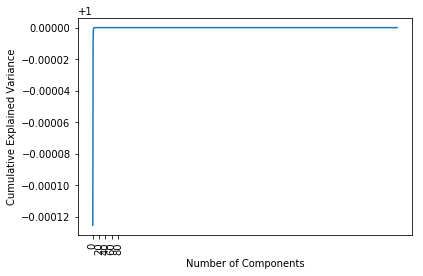

In [6]:
#Determining proper number of components

from sklearn.decomposition import PCA 

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.xticks(np.arange(0,100, 5), rotation = 'vertical')
plt.ylabel('Cumulative Explained Variance')

In [9]:
sklearn_pca = PCA(n_components=5)
credit_pca = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [9.99874693e-01 1.15903780e-04 8.65483409e-06 4.35848932e-07
 1.97402904e-07]


In [10]:
#Confirm dimensionality reduction
credit_pca.shape

(1000, 5)

## Handle Class Imbalance by Taking a 50/50 DataFrame

In [14]:
#Create dataframe of only Default observations
default_true = Credit[Credit['default_ind'] == 1]

#Confirm number of default observations
print(len(default_true))

58


In [15]:
#Create dataframe of only non-default observations, then take a sample
default_not_true = Credit[Credit['default_ind'] == 0]
default_not_true = default_not_true.sample(n = 58)

#Confirm number of non-default observations
print(len(default_not_true))

58


In [16]:
#Combine our two dataframes (default and non-default) into one
credit_revised = default_true.append(default_not_true)

In [17]:
#Confirm this worked
credit_revised.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,default_ind
299611,27170012,29683030,14000,14000,14000.0,36 months,20.20,521.72,E,E3,...,1173.43,913.45,0.0,2702.56,486.4608,521.72,1,INDIVIDUAL,0,1
224168,1074266,1310160,16000,10225,10225.0,60 months,12.69,231.04,B,B5,...,2413.91,1729.33,0.0,14.36,0.0000,231.04,1,INDIVIDUAL,0,1
384396,14758904,16831348,24000,24000,24000.0,36 months,14.16,822.13,C,C2,...,3330.48,1602.30,0.0,0.00,0.0000,822.13,1,INDIVIDUAL,0,1
434688,10726769,12618849,16000,16000,16000.0,60 months,15.61,385.79,C,C4,...,3355.87,3202.56,0.0,0.00,0.0000,385.79,1,INDIVIDUAL,0,1
58807,8926276,10718317,15000,15000,15000.0,36 months,15.61,524.48,C,C3,...,7894.57,3119.09,0.0,0.00,0.0000,524.48,1,INDIVIDUAL,0,1


In [17]:
credit_revised.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 197076 to 524412
Data columns (total 41 columns):
id                         116 non-null int64
member_id                  116 non-null int64
loan_amnt                  116 non-null int64
funded_amnt                116 non-null int64
funded_amnt_inv            116 non-null float64
term                       116 non-null object
int_rate                   116 non-null float64
installment                116 non-null float64
grade                      116 non-null object
sub_grade                  116 non-null object
home_ownership             116 non-null object
annual_inc                 116 non-null float64
verification_status        116 non-null object
issue_d                    116 non-null object
pymnt_plan                 116 non-null object
purpose                    116 non-null object
zip_code                   116 non-null object
addr_state                 116 non-null object
dti                        116 non-null f

In [27]:
#Reestablish X and Y
X = credit_revised.drop(['default_ind'], 1)
X = pd.get_dummies(X)
Y = credit_revised.default_ind

#Run our default models
#Bernoulli Naive Bayes
NB_Model('Bernoulli')
print('\n\n')

#K-Nearest Neighbors
KNN_Model(5, 'uniform')
print('\n\n')

#Random Forest
RFC_Model(10, 'gini', 'auto', None)
print('\n\n')

#Plain Logistic Regression
Logistic_Reg_Model('l2', 1e9)
print('\n\n')

#Lasso Logistic Regression
Logistic_Reg_Model('l1', 1.0)
print('\n\n')

#Ridge Logistic Regression
Logistic_Reg_Model('l2', 1.0)
print('\n\n')



 Percentage accuracy for Bernoulli Naive Bayes
94.0677966101695%

 Cross-Validation Score
[0.79166667 1.         0.79166667 0.875      0.81818182]

 Confusion Matrix


array([[58,  1],
       [ 6, 53]])



 Program Executed in 0.06




 Percentage accuracy for K Nearest Neighbors Classifier
76.27118644067797%

 Cross-Validation Score
[0.54166667 0.66666667 0.66666667 0.66666667 0.72727273]

 Confusion Matrix


array([[41, 18],
       [10, 49]])



 Program Executed in 0.09




 Percentage accuracy for Random Forest Classifier
99.15254237288136%

 Cross-Validation Score
[0.875      0.875      0.875      0.875      0.77272727]

 Confusion Matrix


array([[59,  0],
       [ 1, 58]])



 Program Executed in 0.32




 Percentage accuracy for Logistic Regression
95.76271186440678%

 Cross-Validation Score
[0.95833333 1.         0.95833333 0.91666667 0.90909091]

 Confusion Matrix


array([[58,  1],
       [ 4, 55]])



 Program Executed in 0.09




 Percentage accuracy for Lasso Logistic Regression
100.0%

 Cross-Validation Score
[0.91666667 1.         0.875      0.91666667 0.81818182]

 Confusion Matrix


array([[59,  0],
       [ 0, 59]])



 Program Executed in 1.87




 Percentage accuracy for Ridge Logistic Regression
95.76271186440678%

 Cross-Validation Score
[0.95833333 1.         1.         0.91666667 0.90909091]

 Confusion Matrix


array([[58,  1],
       [ 4, 55]])



 Program Executed in 0.16





In [ ]:
#Support Vector Classifier
SVC_Model(1.0, 'rbf')
print('\n\n')


In [28]:

#Gradient boost classifier
Gradient_Boost_Model(100, 3, 'deviance', 1.0)


 Percentage accuracy for Gradient Boosting Classifier
100.0%

 Cross-Validation Score
[0.91666667 1.         0.875      0.91666667 0.81818182]

 Confusion Matrix


array([[59,  0],
       [ 0, 59]])



 Program Executed in 1.59


## Now we have some improvement! Re-run models with tuned parameters to see if we can improve even more.

In [18]:
#Run Gaussian instead of Bernoulli
NB_Model('Gaussian')
print('\n\n')

#K-Nearest Neighbors (use 25 for K instead of 5 and 'distance' for weight)
KNN_Model(50, 'distance')
print('\n\n')

#Random Forest (use 50 trees, 'entropy' as the criterion)
RFC_Model(50, 'entropy', 'auto', None)
print('\n\n')

#Lasso Logistic Regression (change alpha to 0.5)
Logistic_Reg_Model('l1', 0.5)
print('\n\n')

#Ridge Logistic Regression (change alpha to 100)
Logistic_Reg_Model('l2', 100)
print('\n\n')


 Percentage accuracy for Gaussian Naive Bayes
90.3%

 Cross-Validation Score
[0.90547264 0.90049751 0.885      0.89949749 0.90452261]

 Confusion Matrix


array([[849,  93],
       [  4,  54]])



 Program Executed in 0.68




 Percentage accuracy for K Nearest Neighbors Classifier
100.0%

 Cross-Validation Score
[0.93532338 0.93532338 0.94       0.94472362 0.94472362]

 Confusion Matrix


array([[942,   0],
       [  0,  58]])



 Program Executed in 2.35




 Percentage accuracy for Random Forest Classifier
100.0%

 Cross-Validation Score
[0.960199   0.95522388 0.97       0.96984925 0.9798995 ]

 Confusion Matrix


array([[942,   0],
       [  0,  58]])



 Program Executed in 2.35




 Percentage accuracy for Lasso Logistic Regression
99.4%

 Cross-Validation Score
[0.99502488 0.98507463 0.985      1.         0.99497487]

 Confusion Matrix


array([[941,   1],
       [  5,  53]])



 Program Executed in 2.49




 Percentage accuracy for Ridge Logistic Regression
99.1%

 Cross-Validation Score
[0.99502488 0.9800995  0.98       1.         0.98994975]

 Confusion Matrix


array([[942,   0],
       [  9,  49]])



 Program Executed in 0.57





In [ ]:
#Support Vector Classifier (change kernel to 'linear')
SVC_Model(1.0, 'linear')
print('\n\n')

In [21]:
# Gradient boost classifier (more estimators, more depth and subsampling)
Gradient_Boost_Model(200, 4, 'deviance', 0.8)


 Percentage accuracy for Gradient Boosting Classifier
100.0%

 Cross-Validation Score
[0.96517413 0.960199   0.99       0.97487437 0.99497487]

 Confusion Matrix


array([[942,   0],
       [  0,  58]])



 Program Executed in 37.24


In [22]:
Credit.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,acc_now_delinq,default_ind
count,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.00000
mean,3.298840e+07,3.556003e+07,14322.525000,14287.100000,14257.673018,13.13674,421.481010,72877.245840,18.292070,0.311000,...,7409.940970,5702.525440,1689.504260,0.371745,51.150320,5.275653,2342.001420,1.0,0.004000,0.05800
std,2.282582e+07,2.412227e+07,8337.854674,8323.674498,8330.668650,4.35710,232.588508,50408.849637,8.315679,0.827625,...,7811.921309,6672.031291,1973.734019,3.504947,476.734932,64.830054,5190.747837,0.0,0.063151,0.23386
min,3.109890e+05,3.109860e+05,1000.000000,1000.000000,766.088171,5.32000,33.240000,8000.000000,0.470000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.00000
25%,1.013431e+07,1.197121e+07,8000.000000,8000.000000,8000.000000,9.97000,251.265000,44000.000000,12.202500,0.000000,...,1660.820000,1119.320000,394.097500,0.000000,0.000000,0.000000,278.945000,1.0,0.000000,0.00000
50%,3.455849e+07,3.723182e+07,12000.000000,12000.000000,12000.000000,12.85000,361.720000,61000.000000,17.830000,0.000000,...,4745.905000,3070.915000,1016.250000,0.000000,0.000000,0.000000,442.850000,1.0,0.000000,0.00000
75%,5.550804e+07,5.910980e+07,20000.000000,19850.000000,19762.500000,15.90750,558.600000,86375.000000,24.082500,0.000000,...,10115.490000,7584.827500,2183.322500,0.000000,0.000000,0.000000,811.982500,1.0,0.000000,0.00000
max,6.783816e+07,7.269688e+07,35000.000000,35000.000000,35000.000000,26.77000,1223.770000,750000.000000,39.720000,12.000000,...,42036.120000,35000.000000,15004.630000,47.410000,11494.860000,1468.764000,34980.800000,1.0,1.000000,1.00000


## Re-run Default Models with New Feature Set

In [23]:
#Reestablish X and Y
X = credit_revised.drop(['default_ind'], 1)
X = pd.get_dummies(X)
Y = credit_revised.default_ind

In [24]:
#Bernoulli Naive Bayes
NB_Model('Bernoulli')
print('\n\n')

#K-Nearest Neighbors
KNN_Model(5, 'uniform')
print('\n\n')

#Random Forest
RFC_Model(10, 'gini', 'auto', None)
print('\n\n')

#Plain Logistic Regression
Logistic_Reg_Model('l2', 1e9)
print('\n\n')

#Lasso Logistic Regression
Logistic_Reg_Model('l1', 1.0)
print('\n\n')

#Ridge Logistic Regression
Logistic_Reg_Model('l2', 1.0)
print('\n\n')

#Gradient boost classifier
Gradient_Boost_Model(100, 3, 'deviance', 1.0)


 Percentage accuracy for Bernoulli Naive Bayes
93.96551724137932%

 Cross-Validation Score
[0.83333333 0.95833333 0.91666667 0.86363636 0.81818182]

 Confusion Matrix


array([[52,  6],
       [ 1, 57]])



 Program Executed in 0.13




 Percentage accuracy for K Nearest Neighbors Classifier
75.86206896551724%

 Cross-Validation Score
[0.625      0.75       0.54166667 0.72727273 0.77272727]

 Confusion Matrix


array([[35, 23],
       [ 5, 53]])



 Program Executed in 0.1




 Percentage accuracy for Random Forest Classifier
99.13793103448276%

 Cross-Validation Score
[0.91666667 0.91666667 0.75       0.72727273 0.90909091]

 Confusion Matrix


array([[58,  0],
       [ 1, 57]])



 Program Executed in 0.32




 Percentage accuracy for Logistic Regression
96.55172413793103%

 Cross-Validation Score
[0.875      0.91666667 0.91666667 0.95454545 0.90909091]

 Confusion Matrix


array([[56,  2],
       [ 2, 56]])



 Program Executed in 0.1




 Percentage accuracy for Lasso Logistic Regression
100.0%

 Cross-Validation Score
[0.875      0.95833333 0.95833333 0.90909091 0.90909091]

 Confusion Matrix


array([[58,  0],
       [ 0, 58]])



 Program Executed in 0.14




 Percentage accuracy for Ridge Logistic Regression
96.55172413793103%

 Cross-Validation Score
[0.95833333 0.91666667 0.91666667 0.95454545 0.90909091]

 Confusion Matrix


array([[56,  2],
       [ 2, 56]])



 Program Executed in 0.14




 Percentage accuracy for Gradient Boosting Classifier
100.0%

 Cross-Validation Score
[0.91666667 0.95833333 0.95833333 1.         0.90909091]

 Confusion Matrix


array([[58,  0],
       [ 0, 58]])



 Program Executed in 1.54


In [25]:
#Support Vector Classifier
SVC_Model(1.0, 'rbf')
print('\n\n')


 Percentage accuracy for SVM
100.0%

 Cross-Validation Score
[0.5 0.5 0.5 0.5 0.5]

 Confusion Matrix


array([[58,  0],
       [ 0, 58]])



 Program Executed in 0.16



